In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Basu gupts\Downloads\Health_insurance - Health_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0.0,yes,southwest,16884.924$
1,18,male,33.77,1.0,no,southeast,1725.5523$
2,28,male,33,3.0,no,southeast,4449.462$
3,33,male,22.705,0.0,no,northwest,21984.47061$
4,32,male,28.88,0.0,no,northwest,3866.8552$
...,...,...,...,...,...,...,...
1558,42,male,20.3,NaN,no,southwest,1984.4533$
1559,48,male,35.3,NaN,no,southwest,2457.502$
1560,39,male,24.32,NaN,no,southeast,12146.971$
1561,63,male,18.5,NaN,no,southwest,9566.9909$


# EDA (Exploratory Data Analysis)

In [3]:
# Find the null values from different columns
df.isna().sum()

age          0
sex          0
bmi          1
children    21
smoker       0
region       0
charges      0
dtype: int64

<AxesSubplot:>

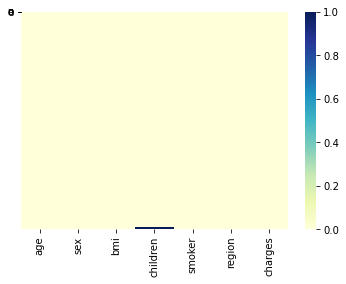

In [4]:
sns.heatmap(df.isnull(), cmap='YlGnBu',cbar=True,yticklabels='none') 

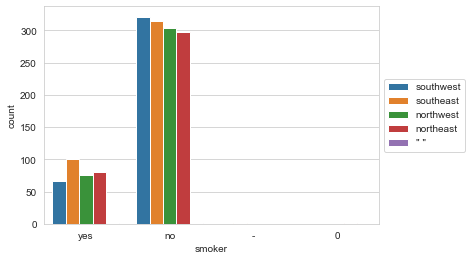

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='smoker', hue='region', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

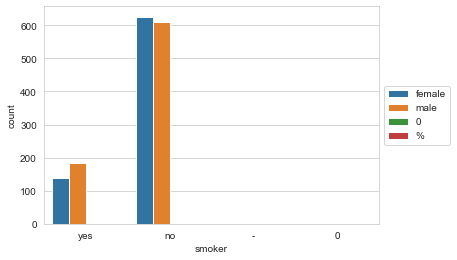

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='smoker', hue='sex', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [7]:
# Finding the noise values from the dataset
col=[x for x in df.columns] 
for i in col:
    (i)
    (df[i].unique())

In [8]:
df.drop(df[(df['age'] == '" "')].index,inplace=True)

In [9]:
df.drop(df[(df['bmi'] == '%')].index,inplace=True)

In [10]:
df.drop(df[(df['sex'] == '0')].index,inplace=True)

In [11]:
df.drop(df[(df['sex'] == '%')].index,inplace=True)

In [12]:
df.drop(df[(df['smoker'] == '-')].index,inplace=True)

In [13]:
df.drop(df[(df['region'] == '" "')].index,inplace=True)

In [14]:
df=df.replace(to_replace ='$',value="")

In [15]:
df['charges']=df['charges'].str.replace('$',"")

C:\Users\Basu gupts\AppData\Local\Temp\ipykernel_9720\1611020218.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['charges']=df['charges'].str.replace('$',"")


In [16]:
m=df.dropna(inplace =True)

In [17]:
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype(float).fillna(0).astype(int)
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce').astype(float).fillna(0).astype(int)
df['charges'] = pd.to_numeric(df['charges'], errors='coerce').astype(float).fillna(0).astype(int)

In [18]:
# Find the statistical summary of the numerical columns (eg. Age, BMI,
# Children, Charges)
df.describe()

,age,bmi,children,charges
count,1533.000000,1533.000000,1533.000000,1533.000000
mean,39.048924,30.179387,1.096543,13194.668624
std,14.170432,6.167996,1.200987,12116.957710
min,18.000000,0.000000,0.000000,0.000000
25%,26.000000,26.000000,0.000000,4738.000000
50%,39.000000,30.000000,1.000000,9249.000000
75%,51.000000,34.000000,2.000000,16450.000000
max,64.000000,53.000000,5.000000,63770.000000


In [19]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.096269,0.046323,0.248107
bmi,0.096269,1.000000,0.010438,0.179414
children,0.046323,0.010438,1.000000,0.059514
charges,0.248107,0.179414,0.059514,1.000000


# Univariate Analysis

<AxesSubplot:>

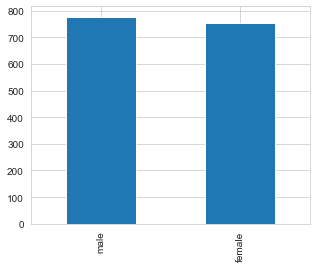

In [20]:
df['sex'].value_counts().plot(kind='bar',figsize=(5,4))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

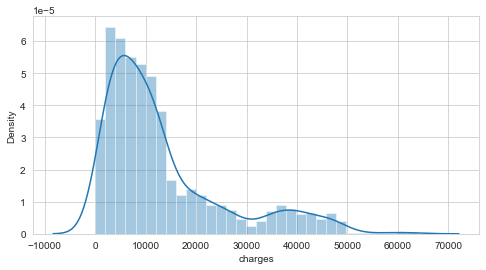

In [21]:
plt.figure(figsize=(8,4))
sns.distplot(df['charges'],hist=True)

# Bivariate and Multivariate Analysis

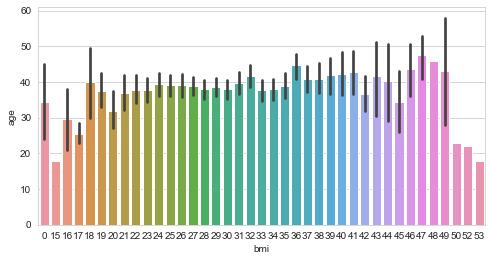

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(x='bmi',y='age',data=df)
plt.show()

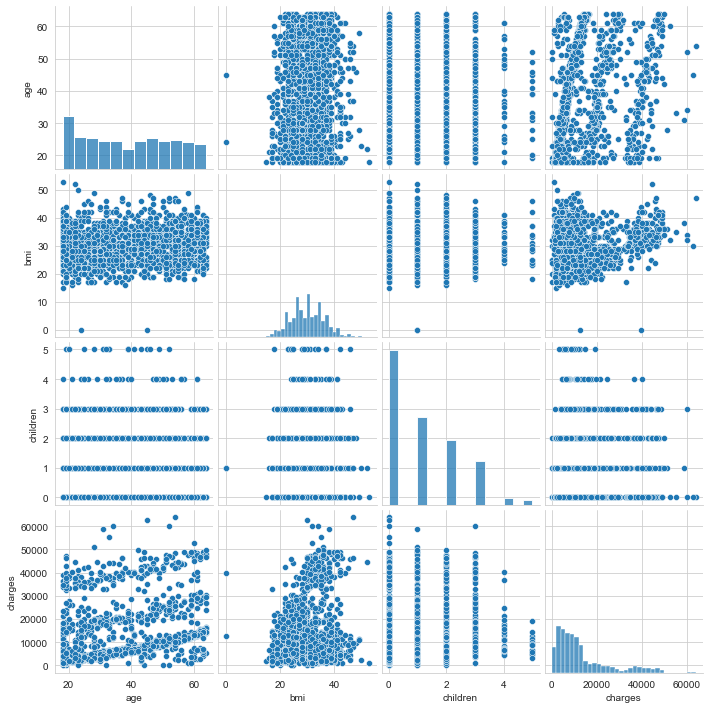

In [23]:
sns.pairplot(df)

<AxesSubplot:>

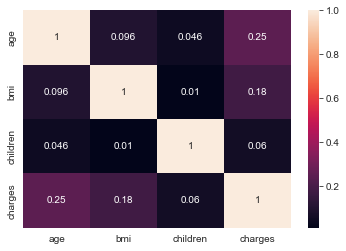

In [24]:
sns.heatmap(df.corr(), annot=True)

In [25]:
col1=['age','bmi','children']

In [26]:
df['age']=pd.to_numeric(df['age'],errors = 'coerce')
df['bmi']=pd.to_numeric(df['bmi'],errors = 'coerce')
df['children']=pd.to_numeric(df['children'],errors = 'coerce')

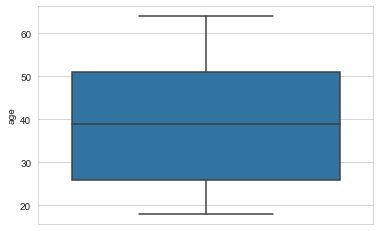

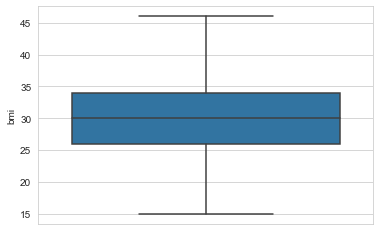

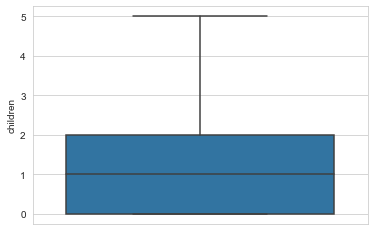

In [27]:
for c in col1:
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    df=df[df[c]<=upper_limit]
    df=df[df[c]>=lower_limit]
    plt.figure()
    sns.boxplot(y=c,data=df)

In [28]:
# Apply the encoding on categorical columns
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
df['sex']=le.fit_transform(df['sex'])

In [31]:
df['smoker']=le.fit_transform(df['smoker'])

In [32]:
df['region']=le.fit_transform(df['region'])

In [33]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0.0,2,3,16884
1,18,1,33,1.0,1,2,1725
2,28,1,33,3.0,1,2,4449
3,33,1,22,0.0,1,1,21984
4,32,1,28,0.0,1,1,3866
...,...,...,...,...,...,...,...
1537,55,1,46,0.0,1,0,2362
1538,43,0,23,1.0,2,1,2352
1539,43,0,31,2.0,1,3,3577
1540,22,1,33,0.0,1,1,3201


In [34]:
# Apply the scaling on numerical columns 

In [35]:
x =df.iloc[:, :-1].values

In [36]:
y=df.iloc [:,-1].values

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [39]:
# Train the linear regression model with the help of all given columns

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg=LinearRegression().fit(x_train,y_train)
reg 

LinearRegression()

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc= StandardScaler()

In [44]:
x_train = sc.fit_transform(x_train)

In [45]:
x_test = sc.transform(x_test)

In [46]:
# Determine the training accuracy
# Determine the testing accuracy

In [47]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [48]:
reg.fit(x_train, y_train)

LinearRegression()

In [57]:
prediction = reg.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix

In [62]:
reg.intercept_

13042.425986842107

In [63]:
reg.coef_

array([3042.23554169,   31.03189741, 1789.13174026,  434.38826656,
       8106.86555934, -108.83084375])

In [64]:
Y_pred = reg.predict(x_test)

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
mean_squared_error(y_test,Y_pred)

55453899.58118075

In [67]:
np.sqrt(mean_squared_error(y_test,Y_pred))

7446.737512574265

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_pred)

0.6548439754014802

In [69]:
# Determine the coefficient and intercept of the model
reg.intercept_

13042.425986842107

In [70]:
reg.coef_

array([3042.23554169,   31.03189741, 1789.13174026,  434.38826656,
       8106.86555934, -108.83084375])